---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

In [149]:
import pandas as pd
import numpy as np
import re
from scipy.stats import ttest_ind

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Display up to certain number of lines of output
pd.set_option('display.max_rows', 600)
pd.set_option('max_colwidth', 100)

# Assignment 4 - Hypothesis Testing
This assignment requires more individual learning than previous assignments - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

Definitions:
* A _quarter_ is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.
* A _recession_ is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
* A _recession bottom_ is the quarter within a recession which had the lowest GDP.
* A _university town_ is a city which has a high percentage of university students compared to the total population of the city.

**Hypothesis**: University towns have their mean housing prices less effected by recessions. Run a t-test to compare the ratio of the mean price of houses in university towns the quarter before the recession starts compared to the recession bottom. (`price_ratio=quarter_before_recession/recession_bottom`)

The following data files are available for this assignment:
* From the [Zillow research data site](http://www.zillow.com/research/data/) there is housing data for the United States. In particular the datafile for [all homes at a city level](http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv), ```City_Zhvi_AllHomes.csv```, has median home sale prices at a fine grained level.
* From the Wikipedia page on college towns is a list of [university towns in the United States](https://en.wikipedia.org/wiki/List_of_college_towns#College_towns_in_the_United_States) which has been copy and pasted into the file ```university_towns.txt```.
* From Bureau of Economic Analysis, US Department of Commerce, the [GDP over time](http://www.bea.gov/national/index.htm#gdp) of the United States in current dollars (use the chained value in 2009 dollars), in quarterly intervals, in the file ```gdplev.xls```. For this assignment, only look at GDP data from the first quarter of 2000 onward.

Each function in this assignment below is worth 10%, with the exception of ```run_ttest()```, which is worth 50%.

In [150]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

In [151]:
df = pd.read_csv('university_towns.txt', sep="\t",header=None, names=['State'])
#df = df.iloc[list(range(236,251))]
#df = df.iloc[list(range(195,215))]
# df.iloc[list(range(80,90))]
all(df['State'][df['State'].str.contains(':|,|\(')==False] == df['State'][~(df['State'].str.contains(':|,|\('))])

len(df)
df.head(20)
df.replace(to_replace = '(\s*\[.*)', value='', regex=True, inplace=True)

#Remove entries with ':' at the end of the string
#df=df[list(map(lambda x: (re.search(":\Z", x)==None), df['State']))]
len(df)

#Copy Region Name (University) to a new column first, entries with ':', ',' or ' ('
df['RegionName']=df['State'][df['State'].str.contains(':|,|\(')]

#Replace Region Name (University) in State column with missing values
df['State']=df['State'][df['State'].str.contains(':|,|\(')==False]

#Now forward-fill in missing values with State names
df['State'].ffill(axis=0, inplace=True)
len(df)

#Drop rows where Region Name (University) is missing
df.dropna(how='any', axis=0, inplace=True)
len(df)

#Now drop university name from Region Name
df['RegionName'].replace(to_replace='\s*\(.*', value='', regex=True, inplace=True)
#df['len']=df['RegionName'].str.len()

df['State'].nunique()
df

#Check if state names match states dictionary
x = pd.DataFrame(list(states.items()), columns=['State Code', 'State']).sort_values('State Code')
x=x.merge(df[['State']].drop_duplicates(), how='outer', on='State', indicator=True)
x[x['_merge']=='left_only']

True

567

,State
0,Alabama[edit]
1,Auburn (Auburn University)[1]
2,Florence (University of North Alabama)
3,Jacksonville (Jacksonville State University)[2]
4,Livingston (University of West Alabama)[2]
5,Montevallo (University of Montevallo)[2]
6,Troy (Troy University)[2]
7,"Tuscaloosa (University of Alabama, Stillman College, Shelton State)[3][4]"
8,Tuskegee (Tuskegee University)[5]
9,Alaska[edit]


567

567

517

50

,State,RegionName
1,Alabama,Auburn
2,Alabama,Florence
3,Alabama,Jacksonville
4,Alabama,Livingston
5,Alabama,Montevallo
6,Alabama,Troy
7,Alabama,Tuscaloosa
8,Alabama,Tuskegee
10,Alaska,Fairbanks
12,Arizona,Flagstaff


,State Code,State,_merge
3,AS,American Samoa,left_only
8,DC,District of Columbia,left_only
12,GU,Guam,left_only
27,MP,Northern Mariana Islands,left_only
30,NA,National,left_only
43,PR,Puerto Rico,left_only
51,VI,Virgin Islands,left_only


In [152]:
def get_list_of_university_towns():
    '''Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. The format of the DataFrame should be:
    DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State", "RegionName"]  )
    
    The following cleaning needs to be done:

    1. For "State", removing characters from "[" to the end.
    2. For "RegionName", when applicable, removing every character from " (" to the end.
    3. Depending on how you read the data, you may need to remove newline character '\n'. '''


    df = pd.read_csv('university_towns.txt', sep='\t', header=None, names=['State'])
    #df = df.iloc[list(range(236,251))]
    #df = df.iloc[list(range(195,215))]

    # df.shape
    df.replace(to_replace = '(\s*\[.*)', value='', regex=True, inplace=True)
    df

    #Remove entries with ':' at the end of the string
    #df=df[list(map(lambda x: (re.search(":\Z", x)==None), df['State']))]

    #Copy Region Name (University) to a new column first, entries with ',' or ' ('
    df['RegionName']=df['State'][df['State'].str.contains(':|,|\(')]

    #Replace Region Name (University) in State column with missing values
    df['State']=df['State'][~(df['State'].str.contains(':|,|\('))]

    #Now forward-fill in missing values with State names
    df['State'].ffill(axis=0, inplace=True)

    #Drop rows where Region Name (University) is missing
    df.dropna(how='any', axis=0, inplace=True)

    #Now drop university name from Region Name
    df['RegionName'].replace(to_replace='\s*\(.*', value='', regex=True, inplace=True)
    #df['len']=df['RegionName'].str.len()
    df
    
    return df
#len(get_list_of_university_towns())
get_list_of_university_towns()

,State,RegionName
1,Alabama,Auburn
2,Alabama,Florence
3,Alabama,Jacksonville
4,Alabama,Livingston
5,Alabama,Montevallo
6,Alabama,Troy
7,Alabama,Tuscaloosa
8,Alabama,Tuskegee
10,Alaska,Fairbanks
12,Arizona,Flagstaff


In [153]:
def get_recession_start():
    '''Returns the year and quarter of the recession start time as a 
    string value in a format such as 2005q3'''
    global gdp
    gdp = pd.read_excel('gdplev.xls', skiprows=8, header=None, usecols=[4,6], names=['Quarter', 'gdp'])
    gdp = gdp[gdp['Quarter']>='2000'].set_index('Quarter')
    gdp = gdp.iloc[:, 0] #Turn dataframe into a series

    global recession
    recession = []
    #Find recession start and end quarters
    for i in range(0,len(gdp)-4):
        if (gdp[i]>gdp[i+1]) &\
            (gdp[i+1]>gdp[i+2]):
                strt=gdp.index[i+1]
                for j in range(i+2, len(gdp)-4):
                    if (gdp[j]<gdp[j+1]) &\
                        (gdp[j+1]<gdp[j+2]):
                        end=gdp.index[j+2]
                        break
                recession = [strt, end]
                break

    return recession[0]

get_recession_start()


'2008q3'

### Visualize GDP Change

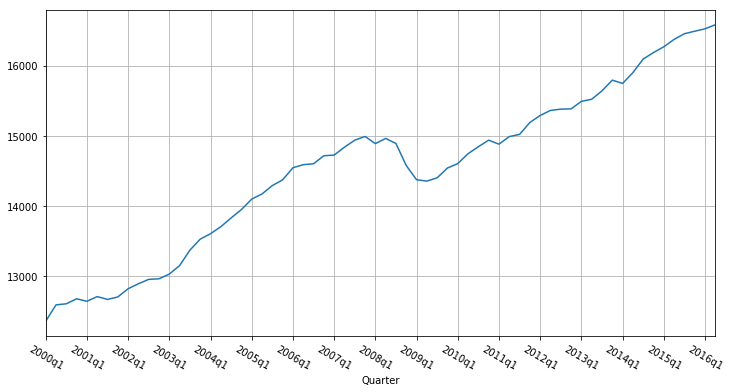

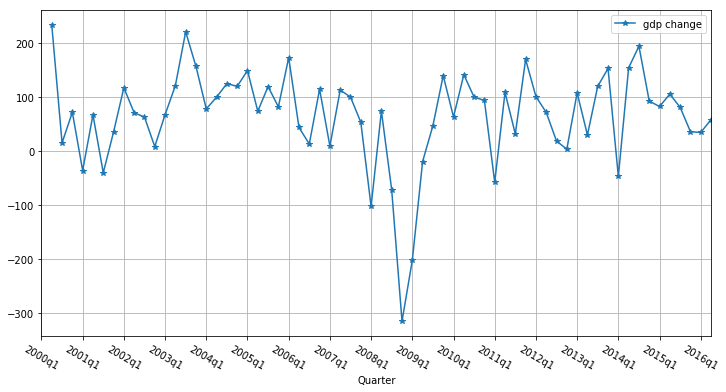

In [154]:
import matplotlib.pyplot as plt

gdp.plot(figsize=(12,6), xticks=list(range(0,65,4)), rot=-30, grid=True)
plt.show()

gdp.diff().plot(figsize=(12,6), xticks=list(range(0,65,4)), rot=-30, grid=True, kind='line', marker='*').legend(['gdp change'])
plt.show()

In [155]:
def get_recession_end():
    '''Returns the year and quarter of the recession end time as a 
    string value in a format such as 2005q3'''
    
    return recession[1]
get_recession_end()

'2009q4'

In [156]:
def get_recession_bottom():
    '''Returns the year and quarter of the recession bottom time as a 
    string value in a format such as 2005q3'''
    recession_period = gdp.loc[(gdp.index>=recession[0]) & (gdp.index<=recession[1])]
    bottom = recession_period[recession_period==recession_period.min()].index[0]
    return bottom
get_recession_bottom()

'2009q2'

In [157]:
def convert_housing_data_to_quarters():
    '''Converts the housing data to quarters and returns it as mean 
    values in a dataframe. This dataframe should be a dataframe with
    columns for 2000q1 through 2016q3, and should have a multi-index
    in the shape of ["State","RegionName"].
    
    Note: Quarters are defined in the assignment description, they are
    not arbitrary three month periods.
    
    The resulting dataframe should have 67 columns, and 10,730 rows.
    '''
    home = pd.read_csv('City_Zhvi_AllHomes.csv')

    # Crate full state name column
    home.rename(columns={'State':'State Code'}, inplace=True)
    home['State'] = home['State Code'].map(states)

    #Remove old columns < year 2000
    delcol = [y for y in home.columns if (y >='1900') & (y <'2000') ]
    home.drop(delcol, axis=1, inplace=True)

    #Keep only working columns, set index
    keepcol = list(['State', 'RegionName'])+list(home.columns[6:-1])
    df = home[keepcol].set_index(['State', 'RegionName'])
    # df.head()

    #Transpose year columns
    T = df.T
    # T.head()

    #Transpose year columns
    T = df.T
    # T.head()

    #Averaging home prices per quarter
    T.index = pd.to_datetime(T.index)
    T = T.resample(rule='Q').mean().to_period('Q') #Now index is in yyyyQ1 format
#     T.head()
    yr = T.index.year
    qt = T.index.quarter

    #Format quarter to yyyyq1
    T.index = list(map(lambda y, q: str(y)+ 'q'+str(q), yr, qt))

    #Now tranpose back
    TT=T.T

#     TT.shape
#     TT.head()
    
    return TT
convert_housing_data_to_quarters()

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.154667e+05,5.228000e+05,5.280667e+05,5.322667e+05,5.408000e+05,5.572000e+05,5.728333e+05,5.828667e+05,5.916333e+05,587200.0
California,Los Angeles,2.070667e+05,2.144667e+05,2.209667e+05,2.261667e+05,2.330000e+05,2.391000e+05,2.450667e+05,2.530333e+05,2.619667e+05,2.727000e+05,...,4.980333e+05,5.090667e+05,5.188667e+05,5.288000e+05,5.381667e+05,5.472667e+05,5.577333e+05,5.660333e+05,5.774667e+05,584050.0
Illinois,Chicago,1.384000e+05,1.436333e+05,1.478667e+05,1.521333e+05,1.569333e+05,1.618000e+05,1.664000e+05,1.704333e+05,1.755000e+05,1.775667e+05,...,1.926333e+05,1.957667e+05,2.012667e+05,2.010667e+05,2.060333e+05,2.083000e+05,2.079000e+05,2.060667e+05,2.082000e+05,212000.0
Pennsylvania,Philadelphia,5.300000e+04,5.363333e+04,5.413333e+04,5.470000e+04,5.533333e+04,5.553333e+04,5.626667e+04,5.753333e+04,5.913333e+04,6.073333e+04,...,1.137333e+05,1.153000e+05,1.156667e+05,1.162000e+05,1.179667e+05,1.212333e+05,1.222000e+05,1.234333e+05,1.269333e+05,128700.0
Arizona,Phoenix,1.118333e+05,1.143667e+05,1.160000e+05,1.174000e+05,1.196000e+05,1.215667e+05,1.227000e+05,1.243000e+05,1.265333e+05,1.283667e+05,...,1.642667e+05,1.653667e+05,1.685000e+05,1.715333e+05,1.741667e+05,1.790667e+05,1.838333e+05,1.879000e+05,1.914333e+05,195200.0
Nevada,Las Vegas,1.326000e+05,1.343667e+05,1.354000e+05,1.370000e+05,1.395333e+05,1.417333e+05,1.433667e+05,1.461333e+05,1.493333e+05,1.509333e+05,...,1.700667e+05,1.734000e+05,1.754667e+05,1.775000e+05,1.816000e+05,1.867667e+05,1.906333e+05,1.946000e+05,1.972000e+05,199950.0
California,San Diego,2.229000e+05,2.343667e+05,2.454333e+05,2.560333e+05,2.672000e+05,2.762667e+05,2.845000e+05,2.919333e+05,3.012333e+05,3.128667e+05,...,4.802000e+05,4.890333e+05,4.964333e+05,5.033667e+05,5.120667e+05,5.197667e+05,5.254667e+05,5.293333e+05,5.362333e+05,539750.0
Texas,Dallas,8.446667e+04,8.386667e+04,8.486667e+04,8.783333e+04,8.973333e+04,8.930000e+04,8.906667e+04,9.090000e+04,9.256667e+04,9.380000e+04,...,1.066333e+05,1.089000e+05,1.115333e+05,1.137000e+05,1.211333e+05,1.285667e+05,1.346000e+05,1.405000e+05,1.446000e+05,149300.0
California,San Jose,3.742667e+05,4.065667e+05,4.318667e+05,4.555000e+05,4.706667e+05,4.702000e+05,4.568000e+05,4.455667e+05,4.414333e+05,4.577667e+05,...,6.794000e+05,6.970333e+05,7.149333e+05,7.314333e+05,7.567333e+05,7.764000e+05,7.891333e+05,8.036000e+05,8.189333e+05,822200.0


In [158]:
def run_ttest():
    '''First creates new data showing the decline or growth of housing prices
    between the recession start and the recession bottom. Then runs a ttest
    comparing the university town values to the non-university towns values, 
    return whether the alternative hypothesis (that the two groups are the same)
    is true or not as well as the p-value of the confidence. 
    
    Return the tuple (different, p, better) where different=True if the t-test is
    True at a p<0.01 (we reject the null hypothesis), or different=False if 
    otherwise (we cannot reject the null hypothesis). The variable p should
    be equal to the exact p value returned from scipy.stats.ttest_ind(). The
    value for better should be either "university town" or "non-university town"
    depending on which has a lower mean price ratio (which is equivilent to a
    reduced market loss).'''
    recession

    #Attach state code to univeristy data
    utown = get_list_of_university_towns().set_index(['State', 'RegionName']).sort_index()

    len(utown)
    #utown.head(20)

    #List of UNIQUE indices with univeristy town
    price = convert_housing_data_to_quarters().sort_index()
        
    uidx = sorted(set(utown.index))
    pidx = sorted(set(price.index))
    utownidx=[x for x in uidx for y in pidx if x==y]  #use unique set otherwise will get duplicate in dataframe
    len(utownidx)

    #Get recession quarter columns, from quarter before recession starts to recession bottom
    strt = get_recession_start()
    bottom = get_recession_bottom()
    prior=pd.date_range(end=strt, periods=1, freq='Q').to_period('Q') #1 quarter prior to recession start
    prior=str(prior.year[0])+'q'+str(prior.quarter[0])
    [prior, strt, bottom]

    recession_quarters = pd.period_range(start=prior, end=bottom, freq='Q')
    cols = list(map(lambda y, q: str(y)+'q'+str(q), recession_quarters.year, recession_quarters.quarter))

    #Now subset housing price data with univeristy town and recession quarter columns
    price = price[cols]

    #Get ratio of mean housing price before recession vs recession bottom
    price['ratio'] = price[cols[0]]/price[cols[-1]]

    #Split data into u-town and non u-town
    utown_df=price.loc[utownidx]
    nutown_df=price.drop(labels=utownidx, axis=0)
    #print('utown: {} + non-utown: {} = {}'.format(len(utown_df), len(nutown_df), len(utown_df)+len(nutown_df)))

    utown_df.head()
    #utown_df[utown_df['ratio'].isnull()]  #12 rows with null ratio --> drop them

    nutown_df.head()
    #nutown_df[nutown_df['ratio'].isnull()]  #863 rows with null ratio --> drop them

    len(utown_df)
    utown_df.dropna(subset=['ratio'], inplace=True)
    len(utown_df)

    len(nutown_df)
    nutown_df.dropna(subset=['ratio'], inplace=True)
    len(nutown_df)

    #Now run ttest
    #   Hypothesis: University towns have their mean housing prices less effected by recessions.
    #   Run a t-test to compare the ratio of the mean price of houses in university towns the quarter
    # before the recession starts compared to the recession bottom. (price_ratio=quarter_before_recession/recession_bottom)

    results = ttest_ind(utown_df['ratio'], nutown_df['ratio'])
    p = results[1]                              # 0.00404147871388
    u_mean = utown_df['ratio'].mean(axis=0)     # mean ratio = 1.072
    nu_mean = nutown_df['ratio'].mean(axis=0)   # mean ratio = 1.097

    if p < 0.01:
        different = True
        if u_mean < nu_mean: better = 'university town'
        else: better = 'non-university town'
    else:
        different = False
        better = None

    return (different, p, better)

run_ttest()

#(True, 0.0040414787138753306, 'university town')

(True, 0.002724063704761164, 'university town')